### 아래 셀에서 파일명만 변경해주세요

In [2]:
with open('/Users/soothingni/Downloads/NOUN_전체.txt', 'r') as f:
    total_docs = [x.split(',')[-1].strip() for x in f.readlines()]

docs_nouns = [x.split(' ') for x in total_docs]

DOCS_NUM=len(docs_nouns) 

total_docs_nouns = [] # corpus에 사용된 모든 단어 저장
for words in docs_nouns:
    total_docs_nouns.extend(words)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [4]:
def tf_extractor(corpus): 
    # returns a frequency-based DTM
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    # min_df: minimum document frequency threshold
         # if min_df = 1 -> 최소 적어도 하나의 문서에서 사용된 단어들은 모두 포함
    # ngram_range=(1,1) -> unigram 만 포함
    # ngram_range=(1,3) -> unigram, bi-gram, tri-gram 까지 고려
    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features  

def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [ ]:
stopwords = ['생각', '까지', '면서', '부터', '대해', '때문', '위해', '대로', '이나', '해주', '도록', '이상', '정말', '내용', '아무', '보고', '래서', '더니', '려면', '고하']

In [5]:
documents_filtered = []
for doc in docs_nouns:
    document_filtered =''
    for word in doc:
        if word not in stopwords:
            document_filtered += ' '+word
    documents_filtered.append(document_filtered) 

#### 전체 데이터로 돌릴 때 커널이 죽는다면 아래 셀을 참고해서 데이터 분할 후 진행하세요 (분할 안해도 잘 돌아간다면 실행x)

In [6]:
#1/2로 분할하기
half = len(document_filtered)//2
h_documents_filtered = documents_filtered[:half]     #데이터 슬라이싱; 이 변수로 끝까지 실행 후 documents_filtered[half:]로 변경하여 한번 더 실행해주어야 함
documents_filtered = h_documents_filtered     #tf_extractor와 tfidf_extractor에 전달할 documents_filtered라는 변수에 분할한 데이터 저장

In [7]:
vectorizer_tf, DTM_tf = tf_extractor(documents_filtered) # 문서들을 TF matrix로 변환

In [8]:
vectorizer_tfidf, DTM_tfidf = tfidf_extractor(documents_filtered) # 문서들을 TFIDF matrix로 변환

In [9]:
import numpy as np

In [10]:
DTM_TF = np.array(DTM_tf.todense())

In [11]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=10) #클러스터 수 / 계산할 횟수
clusters = kmeans.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습

In [13]:
dis_total = 0
for i, k in enumerate(clusters):
    dis = np.linalg.norm(DTM_TFIDF[i]-kmeans.cluster_centers_[k])
    dis_total += dis**2
    print('Doc: {0}, Cluster: {1}, Distance to the center: {2}'.format(i, k, dis))
print(dis_total)

Doc: 0, Cluster: 1, Distance to the center: 1.0026363941654663
Doc: 1, Cluster: 0, Distance to the center: 0.8849725864267001
Doc: 2, Cluster: 1, Distance to the center: 0.9992843292090688
Doc: 3, Cluster: 1, Distance to the center: 0.9941822406864674
Doc: 4, Cluster: 1, Distance to the center: 0.9996200267807185
Doc: 5, Cluster: 1, Distance to the center: 0.9722316022357101
Doc: 6, Cluster: 1, Distance to the center: 1.0013352775163622
Doc: 7, Cluster: 1, Distance to the center: 0.9963456500530418
Doc: 8, Cluster: 1, Distance to the center: 0.9894363259266138
Doc: 9, Cluster: 1, Distance to the center: 0.996900925392595
Doc: 10, Cluster: 1, Distance to the center: 0.9879733149439627
Doc: 11, Cluster: 1, Distance to the center: 0.9922075774564522
Doc: 12, Cluster: 1, Distance to the center: 0.9820753689080391
Doc: 13, Cluster: 1, Distance to the center: 0.9906534552938235
Doc: 14, Cluster: 1, Distance to the center: 0.9795565190706289
Doc: 15, Cluster: 1, Distance to the center: 0.9849

Doc: 1120, Cluster: 1, Distance to the center: 0.9789754952711905
Doc: 1121, Cluster: 1, Distance to the center: 0.9944464913671902
Doc: 1122, Cluster: 2, Distance to the center: 0.8068511659151218
Doc: 1123, Cluster: 3, Distance to the center: 0.9073159250417305
Doc: 1124, Cluster: 1, Distance to the center: 0.9928178199342947
Doc: 1125, Cluster: 2, Distance to the center: 0.7269567125994861
Doc: 1126, Cluster: 1, Distance to the center: 0.9991301055392059
Doc: 1127, Cluster: 2, Distance to the center: 0.8348553713310737
Doc: 1128, Cluster: 1, Distance to the center: 0.987300078701412
Doc: 1129, Cluster: 1, Distance to the center: 0.9902205051091152
Doc: 1130, Cluster: 1, Distance to the center: 0.9747560423876923
Doc: 1131, Cluster: 3, Distance to the center: 0.9500184512480463
Doc: 1132, Cluster: 2, Distance to the center: 0.9312010276119376
Doc: 1133, Cluster: 1, Distance to the center: 0.9926662062218884
Doc: 1134, Cluster: 1, Distance to the center: 0.9934609162934326
Doc: 1135, 

Doc: 2137, Cluster: 1, Distance to the center: 0.9950460344303239
Doc: 2138, Cluster: 1, Distance to the center: 0.9882530741255958
Doc: 2139, Cluster: 1, Distance to the center: 0.9892842394981358
Doc: 2140, Cluster: 1, Distance to the center: 0.9869041415488576
Doc: 2141, Cluster: 1, Distance to the center: 0.9809962021309352
Doc: 2142, Cluster: 1, Distance to the center: 0.9889785092668331
Doc: 2143, Cluster: 0, Distance to the center: 0.8475551171420026
Doc: 2144, Cluster: 1, Distance to the center: 0.9999564412427989
Doc: 2145, Cluster: 1, Distance to the center: 0.9940606548430333
Doc: 2146, Cluster: 1, Distance to the center: 0.9777760277686482
Doc: 2147, Cluster: 1, Distance to the center: 0.9938791449518495
Doc: 2148, Cluster: 3, Distance to the center: 0.9676830780713812
Doc: 2149, Cluster: 3, Distance to the center: 0.924173629990312
Doc: 2150, Cluster: 1, Distance to the center: 0.9980533641437204
Doc: 2151, Cluster: 1, Distance to the center: 0.997321858475017
Doc: 2152, C

In [14]:
kmeans.score(DTM_TFIDF)

-2957.522874902677

### optimal 클러스터 수 구하기

In [15]:
import matplotlib.pylab as pl

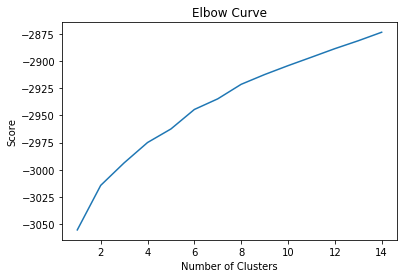

In [19]:
number_clusters = range(1, 15)
kmeans_list = []
for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i))
scores = []
for i in range(len(kmeans_list)):
    scores.append(kmeans_list[i].fit(DTM_TFIDF).score(DTM_TFIDF))
    # score = - sum of sq
    # score indicates the variance explained by the clusters
pl.plot(number_clusters,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### optimal 클러스터 수 구하기2

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, max_iter=10)
    cluster = kmeans.fit_predict(DTM_TFIDF) 
    print(k, silhouette_score(DTM_TFIDF, cluster))

2 0.007748338606561414
3 0.009924670969823702
4 0.011171199647457702
5 0.01251345757775234
6 0.014975141731313575
7 0.0165431544446641


In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster_idf = AgglomerativeClustering(linkage='ward', n_clusters=5)

In [38]:
clusters = cluster_idf.fit(DTM_TF)

In [39]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
? linkage

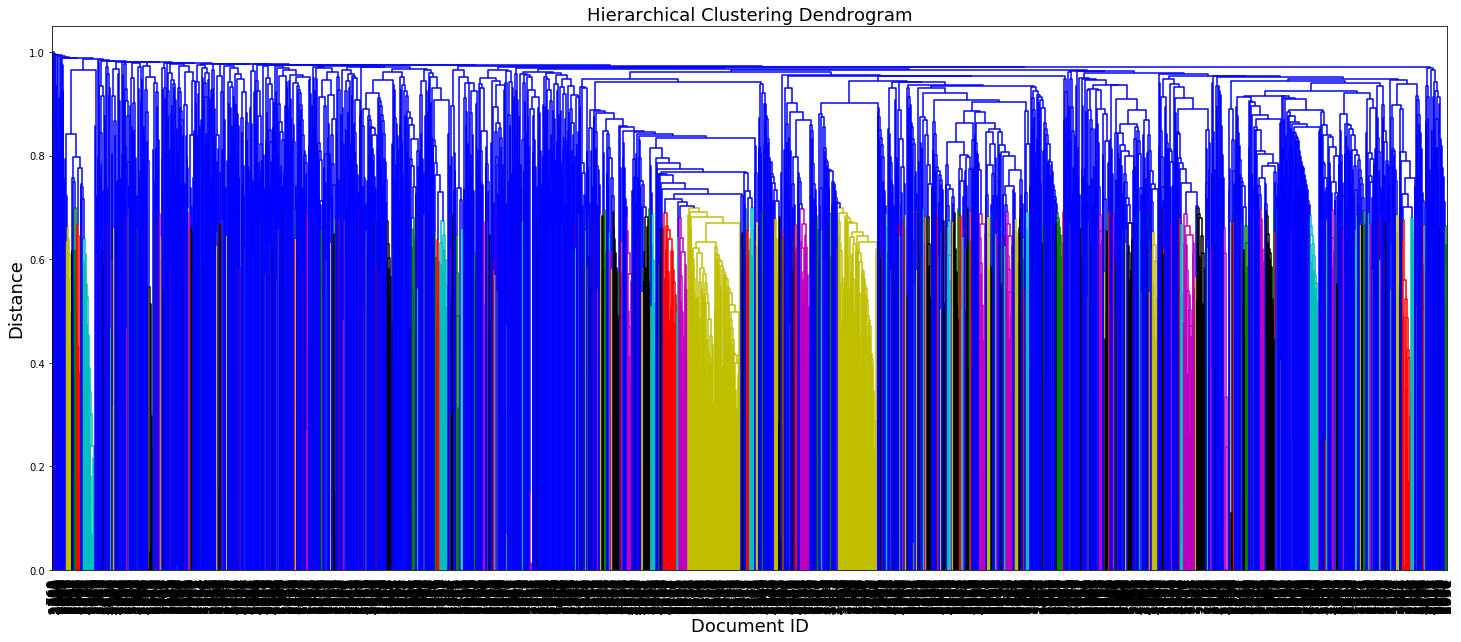

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(DTM_TF, 'average', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()